In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
shp_file_path = './data/shenzhen_grid/shenzhen_grid.shp'
shenzhen_grid = gpd.read_file(shp_file_path)

# 一个网格维度由三个分量组成

In [7]:
from scipy.linalg import qr

C:\Users\Cover\AppData\Local\Temp\ipykernel_81892\3858955947.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shenzhen_grid.geometry.centroid


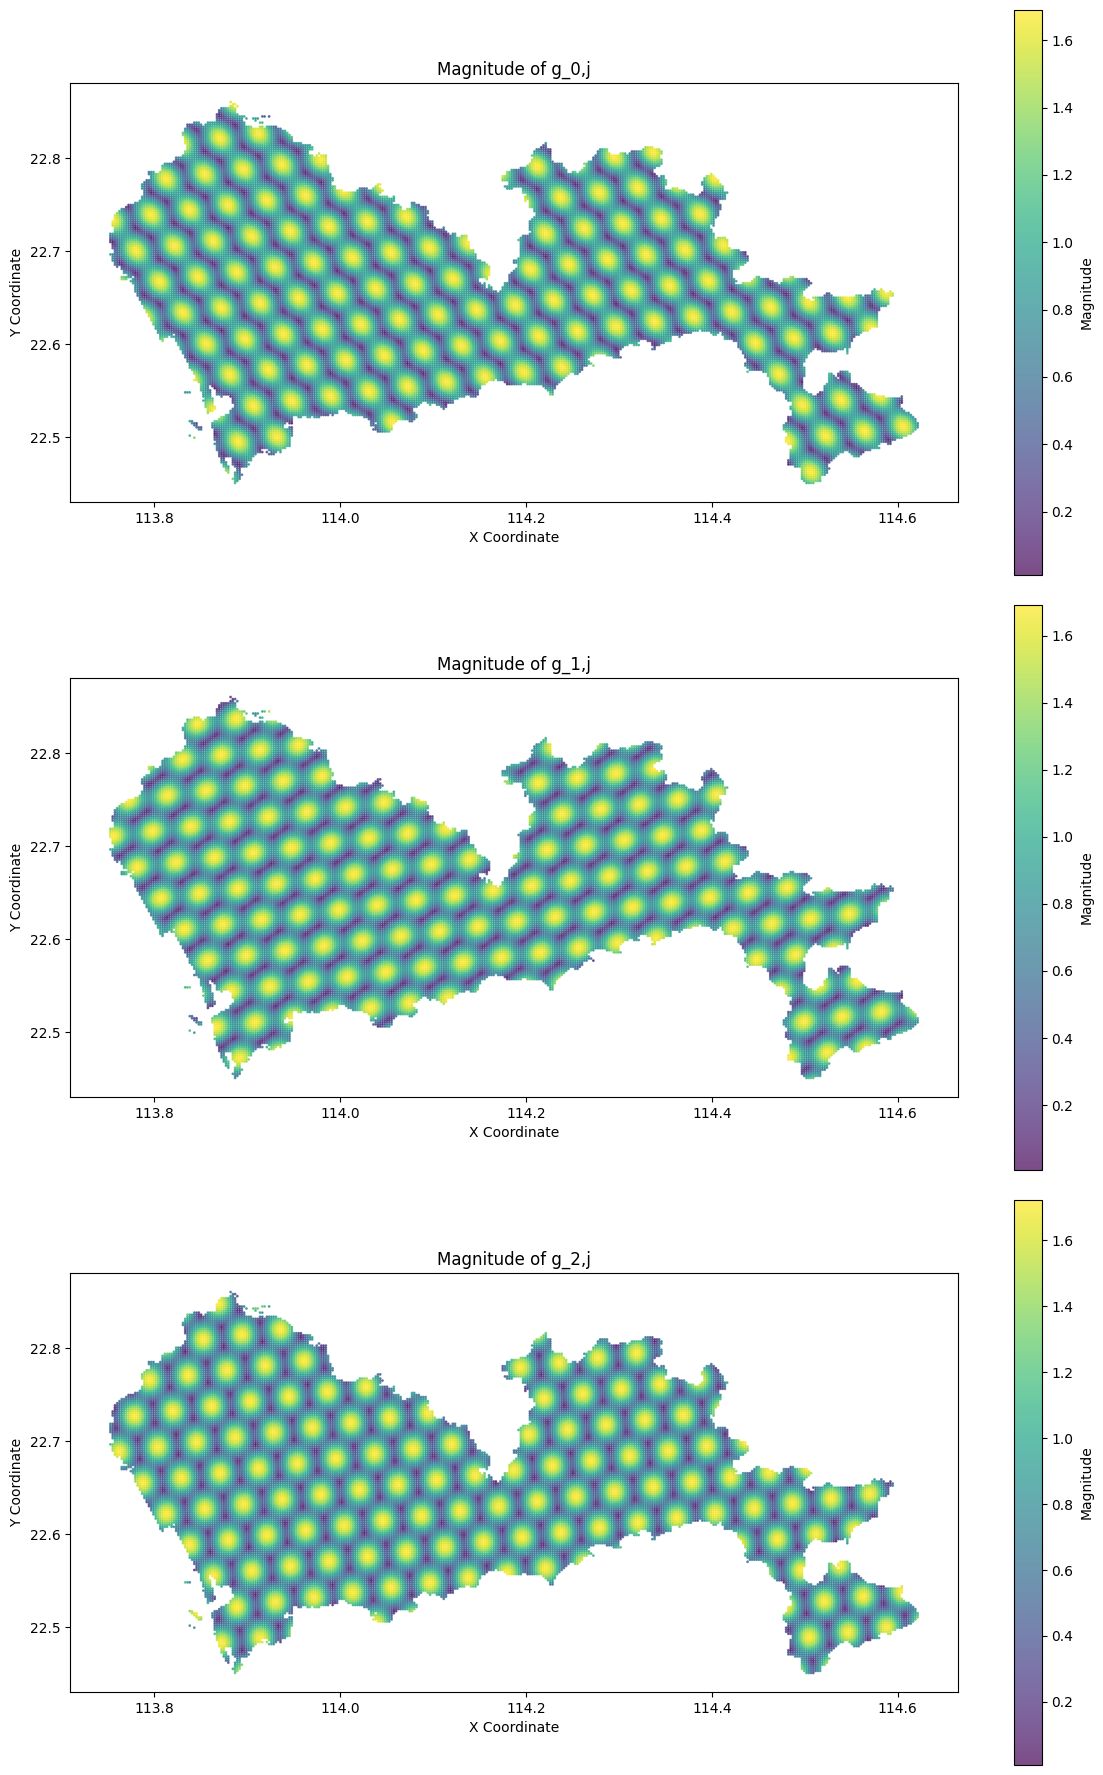

In [11]:
centroids = shenzhen_grid.geometry.centroid
x = centroids.x # 经度
y = centroids.y # 纬度
dimension = 1
 # 生成随机复数矩阵并进行QR分解以近似满足 CC* = I 的条件
A = np.random.randn(3, 3) + 1j * np.random.randn(3, 3) # 3x3 matrix
Q, R = qr(A)  # QR分解

for k in range(1, dimension+1):
    # 定义旋转矩阵
    theta = 2 * np.pi / 3  
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    # 定义omega向量
    random_angle = np.random.uniform(0, 2 * np.pi)
    scale_factor = (100**(k/dimension)) # note: when there is more than one grid layer, it is useful for scaling.
    omega_n0 = np.array([np.cos(random_angle), np.sin(random_angle)]) * scale_factor # direction unit vector
    omega_n1 = R.dot(omega_n0) # vector, rotate omega_n0 by 120 degrees
    omega_n2 = R.dot(omega_n1) # vector

    # 合并坐标
    coords = np.vstack((x, y)) # 2xN matrix

    # 计算e^(iω'nx)
    eiw0x = np.exp(1j * np.dot(omega_n0,coords)) # N-dim vector computed
    eiw1x = np.exp(1j * np.dot(omega_n1,coords))
    eiw2x = np.exp(1j * np.dot(omega_n2,coords))

    # 应用矩阵C(Q作为近似)
    g = Q.dot(np.array([eiw0x, eiw1x, eiw2x])) # 3xN vector

    magnitude = np.abs(g)

    # 创建三个子图，分别展示g_nj的每一行对应的模
    fig, ax = plt.subplots(3, 1, figsize=(12, 18))

    for i in range(3):
        scatter = ax[i].scatter(x, y, c=magnitude[i], cmap='viridis', s=1, alpha=0.7)
        ax[i].set_title(f'Magnitude of g_{i},j')
        ax[i].set_xlabel('X Coordinate')
        ax[i].set_ylabel('Y Coordinate')
        ax[i].set_aspect('equal')
        fig.colorbar(scatter, ax=ax[i], label='Magnitude')

    plt.tight_layout()
    plt.show()

C:\Users\Cover\AppData\Local\Temp\ipykernel_81052\3808353417.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shenzhen_grid.geometry.centroid
d:\Application\Conda\envs\geoneuro\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Application\Conda\envs\geoneuro\lib\site-packages\matplotlib\axes\_axes.py:4455: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


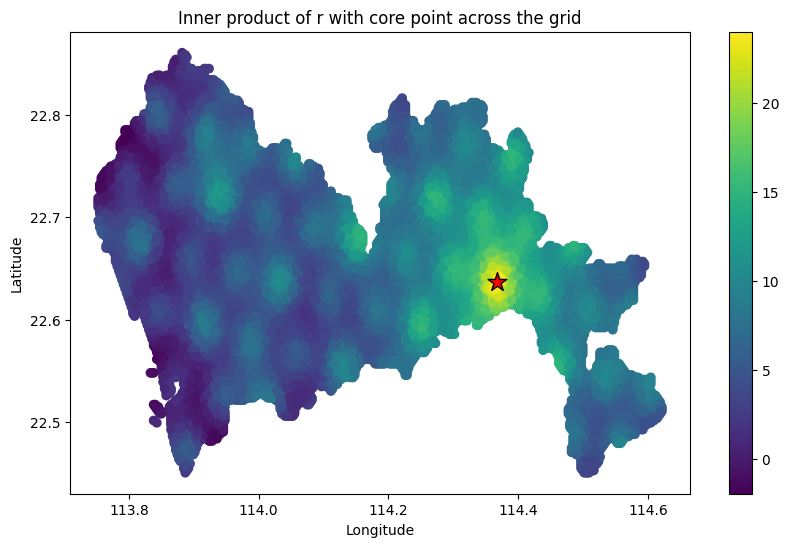

In [5]:
from scipy.linalg import qr

centroids = shenzhen_grid.geometry.centroid
x = centroids.x
y = centroids.y
dimension = 8
 # 生成随机复数矩阵并进行QR分解以近似满足 CC* = I 的条件
A = np.random.randn(3, 3) + 1j * np.random.randn(3, 3)
Q, R = qr(A)  # QR分解

g = np.empty((0, len(x))) 
for k in range(1,dimension+1):
    # 定义旋转矩阵
    theta = 2 * np.pi / 3  
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    # 定义omega向量
    random_angle = np.random.uniform(0, 2 * np.pi)
    scale_factor = (100**(k/dimension))
    omega_n0 = np.array([np.cos(random_angle), np.sin(random_angle)]) * scale_factor
    omega_n1 = R.dot(omega_n0)
    omega_n2 = R.dot(omega_n1)

    # 合并坐标
    coords = np.vstack((x, y))

    # 计算e^(iω'nx)
    eiw0x = np.exp(1j * np.dot(omega_n0,coords))
    eiw1x = np.exp(1j * np.dot(omega_n1,coords))
    eiw2x = np.exp(1j * np.dot(omega_n2,coords))

    # 应用矩阵C(Q作为近似)
    g_n = Q.dot(np.array([eiw0x, eiw1x, eiw2x]))
    if k == 1:
        g = g_n
    else:
        g = np.concatenate((g, g_n), axis=0)

core_point_index = len(x) // 2  # Use the middle point of the flattened grid as the core
# Compute the inner product of r with the core point for all points
inner_products = [np.dot(np.conjugate(g[:, core_point_index]), g[:, r]) for r in range(g.shape[1])]
# Visualize the result of the inner product for the last dimension
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=inner_products, cmap='viridis')
plt.colorbar()
plt.scatter(x[core_point_index], y[core_point_index], c='red', s=200, marker='*', edgecolor='black', label='Core Point')
plt.title('Inner product of r with core point across the grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [6]:
x = 0
x += 1
x += 1
x += 1
x += 1
x += 1
x += 1
x += 1
x += 1
x += 1
x += 1